# UT3 - Práctica 8

## Ejercicio 1

Antes de empezar a trabajar, tendrás que importar las librerías de NumPy y Matplotlib.Pyplot para poder trabajar con ellas:

In [34]:
import numpy as np
import matplotlib.pyplot as plt

función para pasar a grayscale

In [35]:
def colorToGrayscale2(img, r=0.2989, g=0.587, b=0.114):
    grayimg = img.copy()
    grayimg = (r*grayimg[:,:,0] + g*grayimg[:,:,1] + b*grayimg[:,:,2])/255 # Función para pasar rgb a grayscale
    return grayimg

imagen a usar

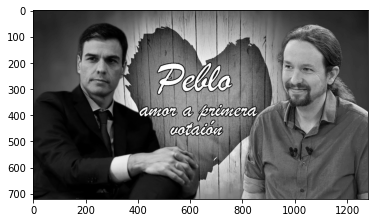

In [36]:
img = colorToGrayscale2(plt.imread("05_peblo.jpg"))
plt.imshow(img, cmap="gray")
plt.show()

---
## Ejercicio 2

Basándote en la función de la práctica 7 ejercicio 2, haz una función que sea capaz de aplicar una máscara de cualquier tamaño (comprobando que sea siempre de tamaño impar y cuadrada) a una imagen (no importa que los límites de la imagen no sean tratados).

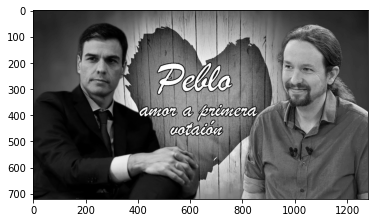

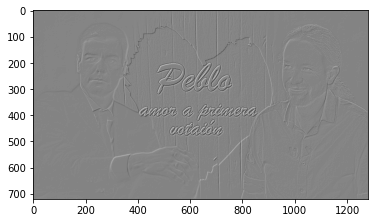

In [37]:
def maskAll(img, mask):
    imgMask = img.copy()
    f = 0
    for fila in imgMask:
        c = 0
        for columna in fila:
            imgMask[f,c] = masking(img, f, c, mask)
            c += 1
        f += 1
    return imgMask

def masking(img, f, c, mask):
    ret = 0
    size = int(mask.shape[0]/2)
    for x in range(-size, size+1, 1):
        for y in range(-size, size+1, 1):
            if (f < img.shape[0]-size) and (c < img.shape[1]-size) and (f >= size) and (c >= size):
                ret += img[f+x, c+y] * mask[x+1, y+1]
    return ret

mask = np.array([[-1,-1,-1,-1,-1],[-1,-1,-1,-1,-1],[-1,-1,24,-1,-1],[-1,-1,-1,-1,-1],[-1,-1,-1,-1,-1]])

plt.imshow(img, cmap="gray")
plt.show()
img2 = maskAll(img, mask)
plt.imshow(img2, cmap="gray")
plt.show()

---
## Ejercicio 3

Incorpora aquí los métodos de segmentación binaria automática de la práctica 6 (ejercicios 3 y 4):

In [38]:
def auto(img):
    val = img.mean() # Según la media de todos los valores
    f = 0
    for filas in img:
        c = 0
        for columnas in filas:
            if columnas < val:
                img[f,c] = 0
            elif columnas >= val:
                img[f,c] = 1
            c += 1
        f += 1
    return img

def otsu(img):
    hist, cortes = np.histogram(img, bins=256) #area y puntos de corte de barras del histograma
    medcortes = (cortes[:-1] + cortes[1:]) / 2 #centro de cada abrra
    peso_ord = np.cumsum(hist) #suma de las areas acumuladas
    peso_rev = np.cumsum(hist[::-1])[::-1] # '' en orden inverso
    media_ord = np.cumsum(hist * medcortes) / peso_ord # media acumulada
    media_rev = (np.cumsum((hist * medcortes)[::-1]) / peso_rev[::-1])[::-1] # '' en orden inverso
    var = peso_ord[:-1] * peso_rev[1:] * (media_ord[:-1] - media_rev[1:]) ** 2 #varianza para la binarización
    val = medcortes[:-1][np.argmax(var)] #valor según la posición de la varianza en la lista
    
    f = 0
    for filas in img:
        c = 0
        for columnas in filas:
            if columnas < val:
                img[f,c] = 0
            elif columnas >= val:
                img[f,c] = 1
            c += 1
        f += 1
    return img

---
## Ejercicio 4

Incorpora aquí las funciones de la práctica 3 (ejercicios 2 y 3) utilizadas para eliminar el ruido y "suavizar" la imagen:

In [39]:
def mediaSCentral(matriz):
    suma = 0
    f = 0
    for fila in matriz:
        c = 0
        for columna in fila:
            if (f != int(matriz.shape[0]/2) or c != int(matriz.shape[1]/2)):
                suma += columna
            c += 1
        f += 1
    return suma/(matriz.size-1)

def suaviza(matriz, size):
    matrizLimpia = matriz.copy()
    mitad = int(size/2)
    f = 0
    for fila in matrizLimpia:
        c = 0
        for columna in fila:
            matrizLimpia[f,c] = mediaSCentral(matriz[f-mitad:f+mitad+1,c-mitad:c+mitad+1])
            c += 1
        f += 1
    return matrizLimpia

---
## Ejercicio 5

Incorpora aquí la función definida en la práctica 2 (ejercicio 7) utilizada para incorporar ruido a una imagen:

In [40]:
def ruido(img, x):
    ruidoimg = img.copy()
    f = 0
    for fila in ruidoimg:
        c = 0
        for columna in fila:
            if (np.random.random() < x/100):
                valor = np.random.randint(0,2)
                ruidoimg[f, c] = valor
            c =c+1
        f = f+1
    return ruidoimg

---
## Ejercicio 6

Utilizando al menos las 5 imágenes que tú quieras, sigue los siguientes pasos:

1. Importa las imágenes
2. Conviértelas a escala de grises
3. Añade ruido a tres de ellas utilizando la función incluída en el ejercicio 5. Aplica los siguientes factores de ruido respectivamente: 1,3,5
4. Suaviza todas las imágenes y reduce el ruido utilizando las funciones del ejercicio 4
5. Aplica la función definida en el ejercicio 2 para resaltar los bordes de una imágen. Para ello, utiliza dos máscaras distintas para cada imágen (lo que dará como resultado dos nuevas imágenes por cada imagen inicial)
6. Segmenta (o umbraliza) 2 de las imágenes iniciales (4 en total si contamos que hemos realzado los bordes para cada una de ellas dos veces) con el método automático definido por tí y las otras 3 (en este caso 6 en total) con el método Otsu y realiza la composición de sus resultados. También puedes hacer pruebas manuales.
7. Realiza la composición de cada par de imágenes tal y como hicimos en la práctica 7.
8. Muestra los resultados obtenidos

**Trata de buscar los mejores resultados posibles para cada imagen**

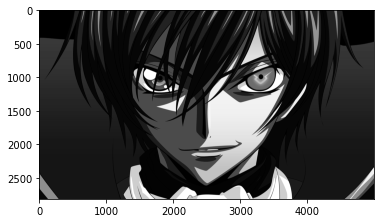

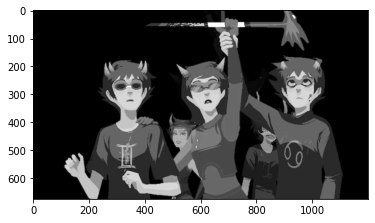

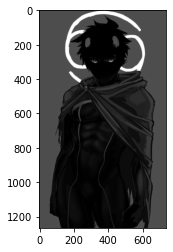

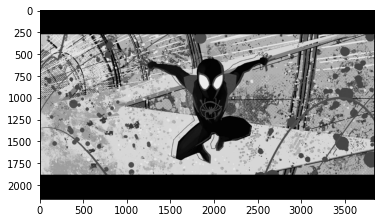

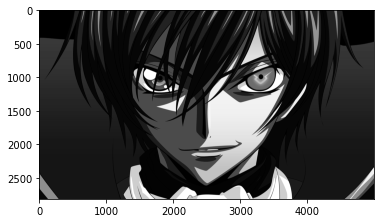

In [41]:
img2 = colorToGrayscale2(plt.imread("05_codegeass.jpg"))
plt.imshow(img2, cmap="gray")
plt.show()

img3 = colorToGrayscale2(plt.imread("05_homestuck.webp"))
plt.imshow(img3, cmap="gray")
plt.show()

img4 = colorToGrayscale2(plt.imread("05_kankri.jpg"))
plt.imshow(img4, cmap="gray")
plt.show()

img5 = colorToGrayscale2(plt.imread("05_spiderverse.webp"))
plt.imshow(img5, cmap="gray")
plt.show()

img6 = colorToGrayscale2(plt.imread("05_ttgl.jpg"))
plt.imshow(img2, cmap="gray")
plt.show()

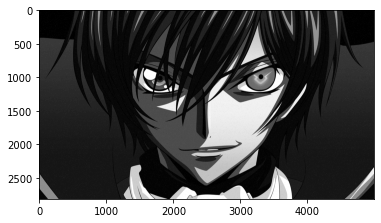

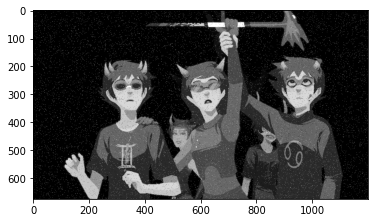

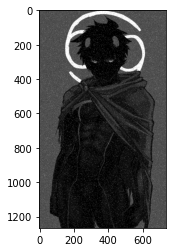

In [42]:
img12 = ruido(img2, 1)
plt.imshow(img12, cmap="gray")
plt.show()
img13 = ruido(img3, 3)
plt.imshow(img13, cmap="gray")
plt.show()
img14 = ruido(img4, 5)
plt.imshow(img14, cmap="gray")
plt.show()

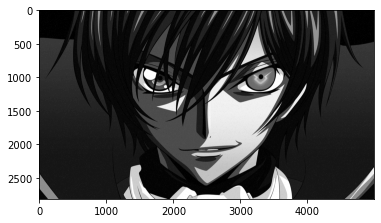

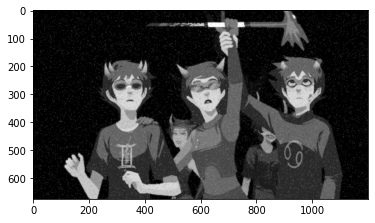

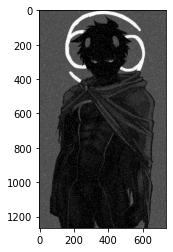

KeyboardInterrupt: 

In [46]:
img22 = suaviza(img12, 3)
plt.imshow(img22, cmap="gray")
plt.show()
img23 = suaviza(img13, 3)
plt.imshow(img23, cmap="gray")
plt.show()
img24 = suaviza(img14, 3)
plt.imshow(img24, cmap="gray")
plt.show()
img25 = suaviza(img5, 3)
plt.imshow(img25, cmap="gray")
plt.show()
img26 = suaviza(img6, 3)
plt.imshow(img26, cmap="gray")
plt.show()


In [ ]:





# Resalta puntos aislados
mask_1  = [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]

# Resaltan líneas horizontales y verticales
mask_2  = [[-1,-1,-1],[2,2,2],[-1,-1,-1]]
mask_3  =  [[-1,2,-1],[-1,2,-1],[-1,2,-1]]

# Resaltan líneas diagonales con 45º o -45º
mask_4  =  [[2,-1,-1],[-1,2,-1],[-1,-1,2]]
mask_5  =  [[-1,-1,2],[-1,2,-1],[2,-1,-1]]

# Resaltan cambios de color (horizontales y verticales) más suaves que las máscaras 2 y 3
mask_6  =  [[-1,-1,-1],[0,0,0],[1,1,1]]
mask_7  =  [[-1,0,1],[-1,0,1],[-1,0,1]]

# Similares a las anteriores pero dando mayor importancia a los píxels centrales (tanto verticales como horizontales)
mask_8  =  [[-1,-2,-1],[0,0,0],[1,2,1]]
mask_9  =  [[-1,0,1],[-2,0,2],[-1,0,1]]

# Una máscara más compleja que podéis probar y ver qué resultados obtenéis
mask_10 = [[0,0,1,0,0],[0,1,2,1,0],[1,2,-16,2,1],[0,1,2,1,0],[0,0,1,0,0]]

# Siempre podéis probar con más máscaras que se os ocurran